# **Linear Non-Gaussian Acyclic Model**

### Prepared by Ayana Ghosh, Email: research.aghosh@gmail.com



## Assumptions


### Linearity, Non-Gaussian continuous error variables (except at most one), Acyclicity and No hidden common causes



## Under these assumptions :
### x = Ax + e where A is the adjacency matrix (lower-triangular like), x are the observed variables













Install packages

In [ ]:
!pip install lingam
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.7/100.7 kB 807.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.7 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=db2050f7b9dd87798f7913c9bc73fd848f72d1ea2e1e6a74581478806dd6a08b
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


Import libraries

In [ ]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot
import warnings
warnings.filterwarnings("ignore")

Generate Test Data

In [ ]:
x3 = np.random.uniform(size=1000)
x0 = 2.0*x3 + np.random.uniform(size=1000)
x2 = 5.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 8.0*x0 + np.random.uniform(size=1000)
x4 = 7.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

,x0,x1,x2,x3,x4,x5
0,0.410188,3.553836,1.030913,0.156306,1.851689,3.908187
1,0.996132,5.419388,1.030207,0.006269,6.017817,8.394454
2,0.801618,7.730314,2.211177,0.308393,4.095876,7.025224
3,2.809775,18.699282,4.972661,0.952139,14.838345,23.310554
4,2.313442,16.722486,4.655697,0.747766,11.604718,19.350476


Create a DAG based on some previous knowledge

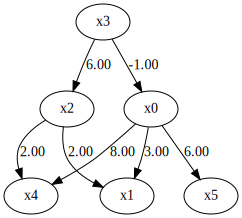

In [ ]:
m = np.array([[0.0, 0.0, 0.0, -1.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [6.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

dot = make_dot(m)

# Save pdf
dot.render('dag')

# Save png
dot.format = 'png'
dot.render('dag')

dot

## Causal Discovery with LiNGAM

In [ ]:
model = lingam.DirectLiNGAM()
model.fit(X)

## Print out the adjacency matrix

In [ ]:
model.adjacency_matrix_

array([[ 0.        ,  0.        ,  0.        ,  1.99957076,  0.        ,
         0.        ],
       [ 3.04339312,  0.        ,  1.99103819,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  4.99263682,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 6.95299416,  0.        , -0.98057457,  0.        ,  0.        ,
         0.        ],
       [ 7.99314462,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

## Draw the DAG

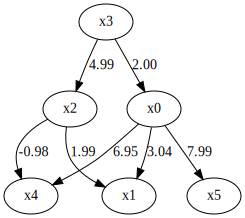

In [ ]:
make_dot(model.adjacency_matrix_)

## We need to ensure the independence of error terms for the validity of the causal inferences made using LiNGAM or other similar methods. If these assumptions fail, then it may lead to biased estimates of causal effects.

## A low p-value suggests evidence against the null hypothesis of independence between error terms, indicating that they are likely not dependent.

In [ ]:
p_values = model.get_error_independence_p_values(X)
print(p_values)

[[0.         0.89545889 0.20788955 0.78121718 0.76157757 0.73726179]
 [0.89545889 0.         0.47995819 0.54646697 0.45593452 0.73636138]
 [0.20788955 0.47995819 0.         0.87780001 0.71276492 0.23036665]
 [0.78121718 0.54646697 0.87780001 0.         0.67003111 0.6857223 ]
 [0.76157757 0.45593452 0.71276492 0.67003111 0.         0.15152413]
 [0.73726179 0.73636138 0.23036665 0.6857223  0.15152413 0.        ]]
